In [1]:
import torch
import json

print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


CUDA available: True
GPU: NVIDIA GeForce GTX 1650 Ti


In [ ]:
import os
import re
import json
import spacy
import nltk
from nltk.corpus import stopwords
from string import punctuation

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Download NLTK stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Mapping sentiment labels to numerical values
SENTIMENT_MAP = {
    "@positive": 1,
    "@neutral": 0,
    "@negative": -1
}

# Define NLP-based preprocessing function
def preprocess_text(text):
    # Extract sentiment label
    sentiment = 0  # Default to neutral if no label is found
    for label, value in SENTIMENT_MAP.items():
        if label in text:
            sentiment = value
            text = text.replace(label, '')  # Remove sentiment tag from text
            break  # Stop after finding the first sentiment label

    # Process text with spaCy
    doc = nlp(text.lower())  # Convert to lowercase

    # Tokenization, lemmatization, removing stopwords and punctuation
    tokens = [
        token.lemma_ for token in doc
        if token.text not in stop_words and token.text not in punctuation and not token.is_space and not token.is_digit
    ]

    return {"sentence": tokens, "sentiment": sentiment}

# List of input files
file_paths = [
    "Sentences_50Agree.txt",
    "Sentences_66Agree.txt",
    "Sentences_75Agree.txt",
    "Sentences_AllAgree.txt"
]

# Process all files and concatenate results
all_processed_data = []
for file_path in file_paths:
    with open(file_path, "r", encoding="ISO-8859-1") as file:
        sentences = file.readlines()

    # Apply NLP preprocessing
    processed_data = [preprocess_text(sentence.strip()) for sentence in sentences]

    # Append to main list
    all_processed_data.extend(processed_data)

# Save all concatenated data as a single JSON file
output_json = "bank.json"
with open(output_json, "w", encoding="utf-8") as json_file:
    json.dump(all_processed_data, json_file, indent=4, ensure_ascii=False)

print(f"Concatenated JSON file saved: {output_json}")


import json
from collections import Counter

# Load processed sentences from JSON file
with open("processed_sentences.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Flatten the list of tokens from all sentences
all_tokens = [token for entry in data for token in entry["sentence"]]

# Count token frequencies
token_counts = Counter(all_tokens)

# Get N least common tokens
N = 20  # Change this to the number of least common tokens you need
least_common_tokens = token_counts.most_common()[:-N-1:-1]  # Get N least common

# Print results
print(f"The {N} least common tokens:")
for token, count in least_common_tokens:
    print(f"{token}: {count}")


In [2]:
import pandas as pd
import re
import json
import spacy
import nltk
from nltk.corpus import stopwords
from string import punctuation

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Download NLTK stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Label mapping
LABEL_MAP = {
    "LABEL_0": -1,  # Bearish → Negative
    "LABEL_1": 1,   # Bullish → Positive
    "LABEL_2": 0    # Neutral
}

# Clean text: remove stock tickers and URLs
def clean_text(text):
    text = re.sub(r'\$\w+', '', text)          # Remove $TICKERS
    text = re.sub(r'https?://\S+', '', text)   # Remove URLs
    return text.strip()

# Preprocess each row
def preprocess_text(text, label):
    text = clean_text(text)
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.text not in stop_words and token.text not in punctuation and not token.is_space and not token.is_digit
    ]
    return {"sentence": tokens, "sentiment": label}

# File paths to process
file_paths = [
    "sent_train.csv",
    "sent_valid.csv",
    # Add more files here if needed
]

# Process and merge all files
all_processed_data = []

for path in file_paths:
    df = pd.read_csv(path)
    processed = [
        preprocess_text(row["text"], LABEL_MAP.get(row["label"], 0))  # default to Neutral if label not found
        for _, row in df.iterrows()
    ]
    all_processed_data.extend(processed)

# Save merged processed data
with open("tweet.json", "w", encoding="utf-8") as f:
    json.dump(all_processed_data, f, indent=4, ensure_ascii=False)

print(" Merged processed data saved to 'merged_processed_data.json'")


ModuleNotFoundError: No module named 'spacy'

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [ ]:
import pandas as pd
import re
import json
import spacy
import nltk
from nltk.corpus import stopwords
from string import punctuation
from datasets import load_dataset

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Download NLTK stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Label mapping for HF dataset
LABEL_MAP = {
    0: -1,  # 0 = Bearish → Negative
    1: 1,   # 1 = Bullish → Positive
    2: 0    # 2 = Neutral
}


# Clean text
def clean_text(text):
    text = re.sub(r'\$\w+', '', text)          # Remove $TICKERS
    text = re.sub(r'https?://\S+', '', text)   # Remove URLs
    return text.strip()

# Preprocess function
def preprocess_text(text, label):
    text = clean_text(text)
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.text not in stop_words and token.text not in punctuation and not token.is_space and not token.is_digit
    ]
    return {"sentence": tokens, "sentiment": LABEL_MAP.get(label, 0)}  # default Neutral

# Load Hugging Face dataset
dataset = load_dataset("TimKoornstra/financial-tweets-sentiment", split="train")
df = dataset.to_pandas()
print(df["sentiment"].unique())
# Process dataset using 'tweet' and 'sentiment'
processed_data = [
    preprocess_text(row["tweet"], row["sentiment"]) for _, row in df.iterrows()
]

# Save to JSON
with open("hugging.json", "w", encoding="utf-8") as f:
    json.dump(processed_data, f, indent=4, ensure_ascii=False)

print(" Processed Hugging Face data saved to 'hugging.json'")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/38091 [00:00<?, ? examples/s]

[2 1 0]
✅ Processed Hugging Face data saved to 'hugging.json'


In [ ]:
import json

# Load tweet.json
with open("tweet.json", "r", encoding="utf-8") as f:
    tweet_data = json.load(f)

# Load stock.json
with open("bank.json", "r", encoding="utf-8") as f:
    stock_data = json.load(f)

with open("hugging.json", "r", encoding="utf-8") as f:
    hugging_data = json.load(f)
#Combine both lists
merged_data = tweet_data + stock_data  + hugging_data

# Save to new JSON file
with open("final.json", "w", encoding="utf-8") as f:
    json.dump(merged_data, f, indent=4, ensure_ascii=False)

print("final.json")

final.json


In [5]:
import json

with open("augmented_final_dupless.json", "r", encoding="utf-8") as f:
    data = json.load(f)


print(f"Original count: {len(data)}")

# Remove duplicates based on both sentence and sentiment
seen = set()
unique_data = []
for item in data:
    key = (tuple(item["sentence"]), item["sentiment"])  # Convert list to tuple for hashing
    if key not in seen:
        seen.add(key)
        unique_data.append(item)

print(f"Unique count: {len(unique_data)}")

with open("augmented_final_dupless(fakeless).json", "w", encoding="utf-8") as f:
    json.dump(unique_data, f, indent=4, ensure_ascii=False)


Original count: 138073
Unique count: 138073


In [ ]:
from google.colab import files
uploaded = files.upload()



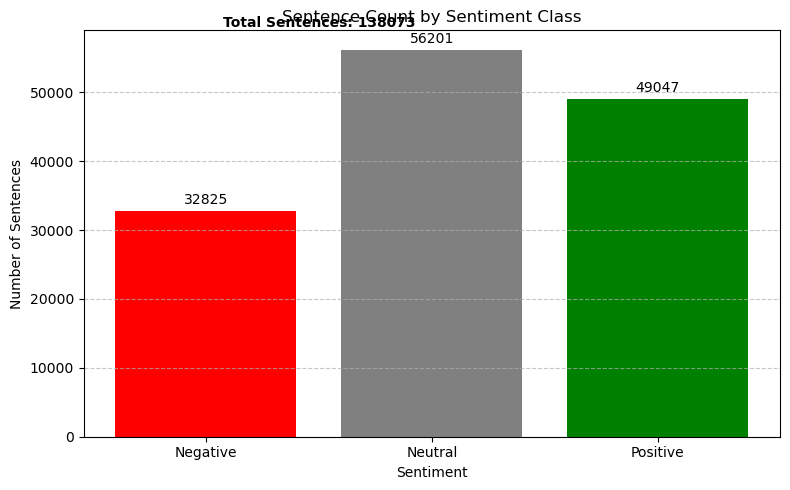

In [2]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Load processed data
with open("augmented.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Count the number of sentences in each sentiment class
sentiment_counts = Counter(entry["sentiment"] for entry in data)

# For consistent order: -1 (negative), 0 (neutral), 1 (positive)
sentiment_labels = {-1: "Negative", 0: "Neutral", 1: "Positive"}
sentiments = [-1, 0, 1]
counts = [sentiment_counts.get(s, 0) for s in sentiments]
labels = [sentiment_labels[s] for s in sentiments]
total_count = sum(counts)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, counts, color=["red", "gray", "green"])
plt.xlabel("Sentiment")
plt.ylabel("Number of Sentences")
plt.title("Sentence Count by Sentiment Class")

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Add total sentence count below the title
plt.text(0.5, max(counts)*1.05, f'Total Sentences: {total_count}',
         ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import json

# Load processed data
with open("final.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Total number of sentences
total_sentences = len(data)

print(f"Total number of sentences: {total_sentences}")


Total number of sentences: 26711


In [ ]:
import os
from collections import Counter

# Define sentiment mapping
SENTIMENT_MAP = {
    "@positive": "Positive",
    "@neutral": "Neutral",
    "@negative": "Negative"
}

# List of files to process
file_paths = [
    "Sentences_50Agree.txt",
    "Sentences_66Agree.txt",
    "Sentences_75Agree.txt",
    "Sentences_AllAgree.txt"
]

# Track grand total across all files
grand_total = 0
overall_sentiment_counts = Counter()

# Process each file
for file_path in file_paths:
    with open(file_path, "r", encoding="ISO-8859-1") as f:
        lines = f.readlines()

    sentiment_counts = Counter()
    for line in lines:
        for tag, label in SENTIMENT_MAP.items():
            if tag in line:
                sentiment_counts[label] += 1
                break

    total = sum(sentiment_counts.values())
    grand_total += total
    overall_sentiment_counts += sentiment_counts

    print(f"📄 {file_path}")
    for sentiment, count in sentiment_counts.items():
        print(f"  {sentiment}: {count}")
    print(f"  Total: {total}\n")

# Print grand total
print("🧾 Overall Total Across All Files:")
for sentiment, count in overall_sentiment_counts.items():
    print(f"  {sentiment}: {count}")
print(f"  Grand Total Sentences: {grand_total}")


📄 Sentences_50Agree.txt
  Neutral: 2879
  Negative: 604
  Positive: 1363
  Total: 4846

📄 Sentences_66Agree.txt
  Neutral: 2535
  Positive: 1168
  Negative: 514
  Total: 4217

📄 Sentences_75Agree.txt
  Neutral: 2146
  Positive: 887
  Negative: 420
  Total: 3453

📄 Sentences_AllAgree.txt
  Neutral: 1391
  Positive: 570
  Negative: 303
  Total: 2264

🧾 Overall Total Across All Files:
  Neutral: 8951
  Negative: 1841
  Positive: 3988
  Grand Total Sentences: 14780


In [ ]:
import pandas as pd
from collections import Counter

# Mapping from LABEL_* to sentiment values
label_map = {
    0: -1,  # Bearish
    1: 1,   # Bullish
    2: 0    # Neutral
}

# File paths
csv_files = ["sent_train.csv", "sent_valid.csv"]

# Track overall totals
overall_counts = Counter()
grand_total = 0

for file_path in csv_files:
    df = pd.read_csv(file_path)

    # Map string labels to integers
    df['mapped_sentiment'] = df['label'].map(label_map)

    # Count each sentiment
    sentiment_counts = df['mapped_sentiment'].value_counts().sort_index()

    print(f"📄 {file_path}")
    for sentiment in [-1, 0, 1]:
        count = sentiment_counts.get(sentiment, 0)
        print(f"  Sentiment {sentiment}: {count}")
        overall_counts[sentiment] += count
        grand_total += count
    print(f"  Total: {sentiment_counts.sum()}\n")

# Grand total across both files
print("🧾 Overall Total Across Both CSV Files:")
for sentiment in [-1, 0, 1]:
    print(f"  Sentiment {sentiment}: {overall_counts.get(sentiment, 0)}")
print(f"  Grand Total Sentences: {grand_total}")


📄 sent_train.csv
  Sentiment -1: 1442
  Sentiment 0: 6178
  Sentiment 1: 1923
  Total: 9543

📄 sent_valid.csv
  Sentiment -1: 347
  Sentiment 0: 1566
  Sentiment 1: 475
  Total: 2388

🧾 Overall Total Across Both CSV Files:
  Sentiment -1: 1789
  Sentiment 0: 7744
  Sentiment 1: 2398
  Grand Total Sentences: 11931


In [6]:
!pip install nlpaug transformers torch --quiet
!pip install nlpaug


In [7]:
import sys
print(sys.executable)


D:\anaconda\envs\torch_env\python.exe


In [8]:
!D:/anaconda/envs/torch_env/python.exe -m pip install nlpaug transformers torch tqdm


  Using cached nlpaug-1.1.11-py3-none-any.whl.metadata (14 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
Using cached nlpaug-1.1.11-py3-none-any.whl (410 kB)
Using cached transformers-4.51.3-py3-none-any.whl (10.4 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
Using cached huggingface_hub-0.30.2-py3-none-any.whl (481 kB)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl (308 kB)
Using cached tokenizers-0.21.1-cp39-abi3-win_amd64.whl (2.4 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:

import json
from tqdm import tqdm
import nlpaug.augmenter.word as naw
from collections import Counter


In [3]:
import json
from tqdm import tqdm
from collections import Counter
import nltk
import nlpaug.augmenter.word as naw
import os

# === Download required NLTK models ===
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")
nltk.download("wordnet")
nltk.download("omw-1.4")

# === Load your JSON dataset ===
with open("final(dupless).json", "r", encoding="utf-8") as f:
    data = json.load(f)

# === Count word frequency ===
word_counts = Counter()
for item in data:
    word_counts.update(item["sentence"])

RARE_THRESHOLD = 5
rare_words = set([word for word, count in word_counts.items() if count < RARE_THRESHOLD])

# === Setup augmenters ===
bert_aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased',
    action="substitute",
    top_k=10,
    device='cpu'  # Use 'cuda' if you have GPU enabled
)
syn_aug = naw.SynonymAug(aug_src='wordnet')

# === Utility function to detect rare tokens ===
def contains_rare_words(tokens):
    return any(token in rare_words for token in tokens)

# === Start augmenting ===
augmented_data = []
checkpoint_interval = 1000  # how often to save
checkpoint_dir = "."        # save into current folder

for idx, item in enumerate(tqdm(data, desc="Augmenting")):
    sentence = item["sentence"]
    sentiment = item["sentiment"]
    text = " ".join(sentence)

    # Decide augmentation count
    if len(sentence) < 5:
        num_augments = 3
    elif contains_rare_words(sentence):
        num_augments = 2
    elif len(sentence) > 15:
        num_augments = 0
    else:
        num_augments = 1

    # Always add the original
    augmented_data.append(item)

    for i in range(num_augments):
        try:
            if i % 2 == 0:
                augmented = bert_aug.augment(text)
            else:
                augmented = syn_aug.augment(text)

            if augmented:
                # Fix: support both str and list returns
                tokens = augmented if isinstance(augmented, list) else augmented.split()
                augmented_data.append({
                    "sentence": tokens,
                    "sentiment": sentiment
                })

        except Exception as e:
            print(f" Augmentation failed at index {idx}, aug #{i} — {e}")
            continue

    # Save checkpoint
    if idx > 0 and idx % checkpoint_interval == 0:
        ckpt_path = os.path.join(checkpoint_dir, f"augmented_checkpoint_{idx}.json")
        with open(ckpt_path, "w", encoding="utf-8") as f:
            json.dump(augmented_data, f, indent=2)
        print(f"💾 Saved checkpoint at {idx} → {ckpt_path}")

# === Final save ===
final_path = os.path.join(checkpoint_dir, "augmented_final_dupless.json")
with open(final_path, "w", encoding="utf-8") as f:
    json.dump(augmented_data, f, indent=2)

print(f"\n All done! Final dataset size: {len(augmented_data)}")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hrush\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Hrush\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hrush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hrush\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Augmenting:   2%|█▏                                                             | 1001/51418 [03:10<2:29:57,  5.60it/s]

💾 Saved checkpoint at 1000 → .\augmented_checkpoint_1000.json


Augmenting:   4%|██▍                                                            | 2001/51418 [06:31<3:04:00,  4.48it/s]

💾 Saved checkpoint at 2000 → .\augmented_checkpoint_2000.json


Augmenting:   6%|███▋                                                           | 3002/51418 [09:46<2:49:56,  4.75it/s]

💾 Saved checkpoint at 3000 → .\augmented_checkpoint_3000.json


Augmenting:   8%|████▉                                                          | 4002/51418 [12:55<2:37:35,  5.01it/s]

💾 Saved checkpoint at 4000 → .\augmented_checkpoint_4000.json


Augmenting:  10%|██████▏                                                        | 5001/51418 [16:15<4:53:02,  2.64it/s]

💾 Saved checkpoint at 5000 → .\augmented_checkpoint_5000.json


Augmenting:  12%|███████▎                                                       | 6001/51418 [19:35<2:58:34,  4.24it/s]

💾 Saved checkpoint at 6000 → .\augmented_checkpoint_6000.json


Augmenting:  14%|████████▌                                                      | 7001/51418 [22:57<3:15:16,  3.79it/s]

💾 Saved checkpoint at 7000 → .\augmented_checkpoint_7000.json


Augmenting:  16%|█████████▊                                                     | 8002/51418 [26:05<3:28:39,  3.47it/s]

💾 Saved checkpoint at 8000 → .\augmented_checkpoint_8000.json


Augmenting:  18%|███████████                                                    | 9001/51418 [29:12<3:45:16,  3.14it/s]

💾 Saved checkpoint at 9000 → .\augmented_checkpoint_9000.json


Augmenting:  19%|████████████                                                  | 10002/51418 [32:26<2:40:07,  4.31it/s]

💾 Saved checkpoint at 10000 → .\augmented_checkpoint_10000.json


Augmenting:  21%|█████████████▎                                                | 11002/51418 [35:33<2:34:43,  4.35it/s]

💾 Saved checkpoint at 11000 → .\augmented_checkpoint_11000.json


Augmenting:  23%|██████████████▍                                               | 12001/51418 [39:45<4:39:29,  2.35it/s]

💾 Saved checkpoint at 12000 → .\augmented_checkpoint_12000.json


Augmenting:  25%|███████████████▋                                              | 13001/51418 [44:41<4:32:41,  2.35it/s]

💾 Saved checkpoint at 13000 → .\augmented_checkpoint_13000.json


Augmenting:  27%|████████████████▉                                             | 14001/51418 [49:29<4:41:08,  2.22it/s]

💾 Saved checkpoint at 14000 → .\augmented_checkpoint_14000.json


Augmenting:  29%|██████████████████                                            | 15001/51418 [53:59<3:35:26,  2.82it/s]

💾 Saved checkpoint at 15000 → .\augmented_checkpoint_15000.json


Augmenting:  31%|███████████████████▎                                          | 16002/51418 [58:28<3:14:49,  3.03it/s]

💾 Saved checkpoint at 16000 → .\augmented_checkpoint_16000.json


Augmenting:  33%|███████████████████▊                                        | 17001/51418 [1:02:25<3:14:26,  2.95it/s]

💾 Saved checkpoint at 17000 → .\augmented_checkpoint_17000.json


Augmenting:  35%|█████████████████████                                       | 18001/51418 [1:05:39<3:48:50,  2.43it/s]

💾 Saved checkpoint at 18000 → .\augmented_checkpoint_18000.json


Augmenting:  37%|██████████████████████▏                                     | 19002/51418 [1:08:50<3:03:17,  2.95it/s]

💾 Saved checkpoint at 19000 → .\augmented_checkpoint_19000.json


Augmenting:  39%|███████████████████████▎                                    | 20002/51418 [1:11:56<3:09:32,  2.76it/s]

💾 Saved checkpoint at 20000 → .\augmented_checkpoint_20000.json


Augmenting:  41%|████████████████████████▌                                   | 21001/51418 [1:15:09<4:23:19,  1.93it/s]

💾 Saved checkpoint at 21000 → .\augmented_checkpoint_21000.json


Augmenting:  43%|█████████████████████████▋                                  | 22002/51418 [1:18:18<3:24:00,  2.40it/s]

💾 Saved checkpoint at 22000 → .\augmented_checkpoint_22000.json


Augmenting:  45%|██████████████████████████▊                                 | 23002/51418 [1:21:29<3:12:56,  2.45it/s]

💾 Saved checkpoint at 23000 → .\augmented_checkpoint_23000.json


Augmenting:  47%|████████████████████████████                                | 24002/51418 [1:24:33<2:47:34,  2.73it/s]

💾 Saved checkpoint at 24000 → .\augmented_checkpoint_24000.json


Augmenting:  49%|█████████████████████████████▏                              | 25002/51418 [1:27:47<2:37:09,  2.80it/s]

💾 Saved checkpoint at 25000 → .\augmented_checkpoint_25000.json


Augmenting:  51%|██████████████████████████████▎                             | 26001/51418 [1:30:54<3:27:08,  2.05it/s]

💾 Saved checkpoint at 26000 → .\augmented_checkpoint_26000.json


Augmenting:  53%|███████████████████████████████▌                            | 27001/51418 [1:34:35<3:24:53,  1.99it/s]

💾 Saved checkpoint at 27000 → .\augmented_checkpoint_27000.json


Augmenting:  54%|████████████████████████████████▋                           | 28001/51418 [1:38:15<3:21:01,  1.94it/s]

💾 Saved checkpoint at 28000 → .\augmented_checkpoint_28000.json


Augmenting:  56%|█████████████████████████████████▊                          | 29002/51418 [1:41:56<2:50:25,  2.19it/s]

💾 Saved checkpoint at 29000 → .\augmented_checkpoint_29000.json


Augmenting:  58%|███████████████████████████████████                         | 30001/51418 [1:45:30<3:04:14,  1.94it/s]

💾 Saved checkpoint at 30000 → .\augmented_checkpoint_30000.json


Augmenting:  60%|████████████████████████████████████▏                       | 31001/51418 [1:48:56<2:49:57,  2.00it/s]

💾 Saved checkpoint at 31000 → .\augmented_checkpoint_31000.json


Augmenting:  62%|█████████████████████████████████████▎                      | 32002/51418 [1:53:09<3:00:22,  1.79it/s]

💾 Saved checkpoint at 32000 → .\augmented_checkpoint_32000.json


Augmenting:  64%|██████████████████████████████████████▌                     | 33001/51418 [1:58:37<4:17:23,  1.19it/s]

💾 Saved checkpoint at 33000 → .\augmented_checkpoint_33000.json


Augmenting:  66%|███████████████████████████████████████▋                    | 34003/51418 [2:01:03<1:45:12,  2.76it/s]

💾 Saved checkpoint at 34000 → .\augmented_checkpoint_34000.json


Augmenting:  68%|████████████████████████████████████████▊                   | 35001/51418 [2:03:53<3:25:48,  1.33it/s]

💾 Saved checkpoint at 35000 → .\augmented_checkpoint_35000.json


Augmenting:  70%|██████████████████████████████████████████                  | 36002/51418 [2:08:37<1:56:02,  2.21it/s]

💾 Saved checkpoint at 36000 → .\augmented_checkpoint_36000.json


Augmenting:  72%|███████████████████████████████████████████▏                | 37001/51418 [2:13:16<2:31:46,  1.58it/s]

💾 Saved checkpoint at 37000 → .\augmented_checkpoint_37000.json


Augmenting:  74%|████████████████████████████████████████████▎               | 38001/51418 [2:18:14<2:05:00,  1.79it/s]

💾 Saved checkpoint at 38000 → .\augmented_checkpoint_38000.json


Augmenting:  76%|█████████████████████████████████████████████▌              | 39001/51418 [2:23:08<2:42:06,  1.28it/s]

💾 Saved checkpoint at 39000 → .\augmented_checkpoint_39000.json


Augmenting:  78%|██████████████████████████████████████████████▋             | 40003/51418 [2:27:54<1:21:12,  2.34it/s]

💾 Saved checkpoint at 40000 → .\augmented_checkpoint_40000.json


Augmenting:  80%|███████████████████████████████████████████████▊            | 41001/51418 [2:32:50<2:04:47,  1.39it/s]

💾 Saved checkpoint at 41000 → .\augmented_checkpoint_41000.json


Augmenting:  82%|█████████████████████████████████████████████████           | 42001/51418 [2:37:37<1:52:31,  1.39it/s]

💾 Saved checkpoint at 42000 → .\augmented_checkpoint_42000.json


Augmenting:  84%|██████████████████████████████████████████████████▏         | 43001/51418 [2:42:48<2:18:14,  1.01it/s]

💾 Saved checkpoint at 43000 → .\augmented_checkpoint_43000.json


Augmenting:  86%|███████████████████████████████████████████████████▎        | 44001/51418 [2:47:41<1:42:08,  1.21it/s]

💾 Saved checkpoint at 44000 → .\augmented_checkpoint_44000.json


Augmenting:  88%|████████████████████████████████████████████████████▌       | 45002/51418 [2:51:57<1:02:24,  1.71it/s]

💾 Saved checkpoint at 45000 → .\augmented_checkpoint_45000.json


Augmenting:  89%|█████████████████████████████████████████████████████▋      | 46001/51418 [2:55:39<1:15:40,  1.19it/s]

💾 Saved checkpoint at 46000 → .\augmented_checkpoint_46000.json


Augmenting:  91%|██████████████████████████████████████████████████████▊     | 47001/51418 [2:59:28<1:10:39,  1.04it/s]

💾 Saved checkpoint at 47000 → .\augmented_checkpoint_47000.json


Augmenting:  93%|█████████████████████████████████████████████████████████▉    | 48002/51418 [3:03:18<28:48,  1.98it/s]

💾 Saved checkpoint at 48000 → .\augmented_checkpoint_48000.json


Augmenting:  95%|███████████████████████████████████████████████████████████   | 49001/51418 [3:06:59<35:26,  1.14it/s]

💾 Saved checkpoint at 49000 → .\augmented_checkpoint_49000.json


Augmenting:  97%|████████████████████████████████████████████████████████████▎ | 50001/51418 [3:12:44<20:53,  1.13it/s]

💾 Saved checkpoint at 50000 → .\augmented_checkpoint_50000.json


Augmenting:  99%|█████████████████████████████████████████████████████████████▍| 51001/51418 [3:16:39<04:41,  1.48it/s]

💾 Saved checkpoint at 51000 → .\augmented_checkpoint_51000.json


Augmenting: 100%|██████████████████████████████████████████████████████████████| 51418/51418 [3:17:50<00:00,  4.33it/s]



✅ All done! Final dataset size: 140136


In [ ]:
with open("augmented_partial.json", "w", encoding="utf-8") as f:
    json.dump(augmented_data, f, indent=2)
print(f" Saved partial result: {len(augmented_data)} entries")


In [3]:
pip install nlpaug transformers sentencepiece torch tqdm --quiet

Note: you may need to restart the kernel to use updated packages.


In [1]:
!python -m spacy download en_core_web_sm


D:\pyEnvForGpu\.venv\python.exe: No module named spacy


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("davidwallach/financial-tweets")



In [2]:
import pandas as pd
import json
import os
import spacy
from nltk.corpus import stopwords
import nltk

# === Setup ===
nltk.download("stopwords")
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words("english"))

# === 1. Load final(dupless).json and drop sentiment ===
with open("final(dupless).json", "r", encoding="utf-8") as f:
    original_data = json.load(f)

cleaned_data = [{"sentence": item["sentence"]} for item in original_data]

# === 2. Load and process Kaggle financial tweets ===
df = pd.read_csv("tweets.csv")  # Make sure the file exists

# Adjust this if different:
sentiment_mapping = {
    "neutral": 0,
    "positive": 1,
    "negative": -1
}

def preprocess(text):
    doc = nlp(str(text).lower())
    return [
        token.lemma_ for token in doc
        if token.is_alpha and token.text not in stop_words
    ]

processed_kaggle = []
for _, row in df.iterrows():
    sentiment = row.get("sentiment")
    if sentiment in sentiment_mapping:
        tokens = preprocess(row.get("text", ""))
        if tokens:
            processed_kaggle.append({
                "sentence": tokens,
                "sentiment": sentiment_mapping[sentiment]
            })

# === 3. Combine cleaned original + kaggle data ===
combined_data = cleaned_data + processed_kaggle

# === 4. Save result ===
with open("final_combined_cleaned.json", "w", encoding="utf-8") as f:
    json.dump(combined_data, f, indent=2)

print(f" Done! Original cleaned: {len(cleaned_data)}, Kaggle added: {len(processed_kaggle)}, Total: {len(combined_data)}")


ModuleNotFoundError: No module named 'pandas'

In [3]:
import json

# Load the original file
with open("final(dupless).json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Count before
before_count = len(data)

# Remove 'sentiment' from each entry
for item in data:
    item.pop("sentiment", None)

# Count after (should be the same unless you're filtering)
after_count = len(data)

# Save the cleaned file
with open("output_no_sentiment.json", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=2)

print(f" Saved as 'output_no_sentiment.json'")
print(f" Rows before: {before_count}")
print(f" Rows after:  {after_count}")


✅ Saved as 'output_no_sentiment.json'
📊 Rows before: 51418
📊 Rows after:  51418


In [5]:
import json

# === Load temp.json (no sentiment) ===
with open("output_no_sentiment.json", "r", encoding="utf-8") as f:
    temp_data = json.load(f)

# === Split into halves ===
midpoint = len(temp_data) // 2
first_half = temp_data[:midpoint]
second_half = temp_data[midpoint:]

# === Load 4.json ===
with open("4.json", "r", encoding="utf-8") as f:
    data_4 = json.load(f)

# === Merge first half with 4.json ===
merged = data_4 + first_half

# === Save to file ===
with open("merged.json", "w", encoding="utf-8") as f:
    json.dump(merged, f, indent=2)

print(f" Merged {len(data_4)} + {len(first_half)} = {len(merged)} entries into 'merged_with_4.json'")


✅ Merged 28241 + 25709 = 53950 entries into 'merged_with_4.json'
